In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [73]:
df = pd.read_csv("output_tasks-10000_sleep-1.csv", parse_dates=["start", "end"], infer_datetime_format=True)

In [74]:
df.head()

,start,end,worker,value
0,2021-06-23 10:10:32.459401,2021-06-23 10:10:32.607256,SpawnPoolWorker-72,7
1,2021-06-23 10:10:32.460728,2021-06-23 10:10:32.607265,SpawnPoolWorker-71,7
2,2021-06-23 10:10:32.464824,2021-06-23 10:10:32.801947,SpawnPoolWorker-73,3
3,2021-06-23 10:10:32.466505,2021-06-23 10:10:32.568788,SpawnPoolWorker-74,10
4,2021-06-23 10:10:32.470241,2021-06-23 10:10:32.671244,SpawnPoolWorker-75,5


In [75]:
start_df = df[["start", "worker"]]
start_df.columns = ["time", "worker"]
start_df = start_df.set_index("time")[["worker"]]
start_df = start_df.groupby("worker").resample("5s").count()
start_df.columns = ["started"]
start_df

started
worker             time                        
SpawnPoolWorker-71 2021-06-23 10:10:30        7
                   2021-06-23 10:10:35       14
                   2021-06-23 10:10:40       23
                   2021-06-23 10:10:45       11
                   2021-06-23 10:10:50       15
...                                         ...
SpawnPoolWorker-77 2021-06-23 10:17:15       14
                   2021-06-23 10:17:20       25
                   2021-06-23 10:17:25       17
                   2021-06-23 10:17:30       13
                   2021-06-23 10:17:35       19

[602 rows x 1 columns]

In [76]:
end_df = df[["end", "worker"]]
end_df.columns = ["time", "worker"]
end_df = end_df.set_index("time")
end_df = end_df.groupby("worker").resample("5s").count()
end_df.columns = ["ended"]
end_df

ended
worker             time                      
SpawnPoolWorker-71 2021-06-23 10:10:30      6
                   2021-06-23 10:10:35     14
                   2021-06-23 10:10:40     23
                   2021-06-23 10:10:45     11
                   2021-06-23 10:10:50     15
...                                       ...
SpawnPoolWorker-77 2021-06-23 10:17:15     14
                   2021-06-23 10:17:20     25
                   2021-06-23 10:17:25     17
                   2021-06-23 10:17:30     13
                   2021-06-23 10:17:35     20

[602 rows x 1 columns]

In [77]:
occurances_df = start_df.join(end_df)
occurances_df["difference"] = occurances_df["started"] - occurances_df["ended"]
occurances_df.head()

started  ended  difference
worker             time                                           
SpawnPoolWorker-71 2021-06-23 10:10:30        7      6           1
                   2021-06-23 10:10:35       14     14           0
                   2021-06-23 10:10:40       23     23           0
                   2021-06-23 10:10:45       11     11           0
                   2021-06-23 10:10:50       15     15           0

In [78]:
sum_occurances_df = occurances_df.reset_index()
sum_occurances_df = sum_occurances_df.groupby("time")[["started", "ended", "difference"]].sum()
sum_occurances_df

,started,ended,difference
time,,,
2021-06-23 10:10:30,66,59,7
2021-06-23 10:10:35,115,115,0
2021-06-23 10:10:40,138,138,0
2021-06-23 10:10:45,113,113,0
2021-06-23 10:10:50,111,111,0
...,...,...,...
2021-06-23 10:17:30,85,86,-1
2021-06-23 10:17:35,51,55,-4
2021-06-23 10:17:40,16,16,0


In [79]:
sum_occurances_df = sum_occurances_df.reset_index()
min_time = sum_occurances_df["time"].min()
sum_occurances_df["time"] = sum_occurances_df["time"].apply(lambda x: int((x - min_time).total_seconds()))
sum_occurances_df = sum_occurances_df.set_index("time")
sum_occurances_df.head()

,started,ended,difference
time,,,
0,66,59,7
5,115,115,0
10,138,138,0
15,113,113,0
20,111,111,0


<AxesSubplot:xlabel='time'>

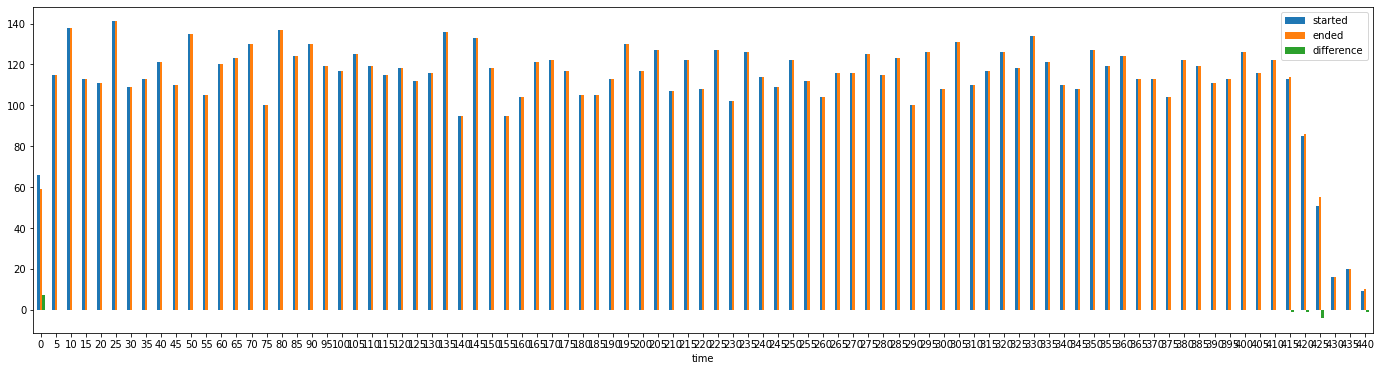

In [80]:
fig, ax = plt.subplots(figsize=(24, 6))
sum_occurances_df.plot(kind="bar", ax=ax, rot=0)

In [7]:
worker_occurances_df = df.reset_index()
worker_occurances_df = worker_occurances_df.groupby(["start", "worker"])[["occurances"]].sum()
worker_occurances_df

occurances
start               worker                        
2021-06-23 10:10:30 SpawnPoolWorker-71           7
                    SpawnPoolWorker-72          14
                    SpawnPoolWorker-73          10
                    SpawnPoolWorker-74           9
                    SpawnPoolWorker-75           5
...                                            ...
2021-06-23 10:17:35 SpawnPoolWorker-75           4
                    SpawnPoolWorker-77          19
2021-06-23 10:17:40 SpawnPoolWorker-72          16
2021-06-23 10:17:45 SpawnPoolWorker-72          20
2021-06-23 10:17:50 SpawnPoolWorker-72           9

[602 rows x 1 columns]

In [8]:
worker_occurances_df = worker_occurances_df.reset_index()
worker_occurances_df["start"] = worker_occurances_df["start"].apply(lambda x: int((x - min_time).total_seconds()))
worker_occurances_df.head()

,start,worker,occurances
0,0,SpawnPoolWorker-71,7
1,0,SpawnPoolWorker-72,14
2,0,SpawnPoolWorker-73,10
3,0,SpawnPoolWorker-74,9
4,0,SpawnPoolWorker-75,5


In [9]:
# rigin.pivot(index='label', columns='type')['value']

In [10]:
worker_occurances_df = worker_occurances_df.pivot(index="start", columns="worker")
worker_occurances_df.head()

occurances                                        \
worker SpawnPoolWorker-71 SpawnPoolWorker-72 SpawnPoolWorker-73   
start                                                             
0                     7.0               14.0               10.0   
5                    14.0               15.0               20.0   
10                   23.0               21.0               24.0   
15                   11.0               22.0                9.0   
20                   15.0               12.0               19.0   

                                                                 \
worker SpawnPoolWorker-74 SpawnPoolWorker-75 SpawnPoolWorker-76   
start                                                             
0                     9.0                5.0               12.0   
5                    11.0               18.0               25.0   
10                   20.0               12.0               18.0   
15                   14.0               16.0               18.0   
20                   19.0               19.0               12.0   

                           
worker SpawnPoolWorker-77  
start                      
0                     9.0  
5                    12.0  
10                   20.0  
15                   23.0  
20                   15.0

<AxesSubplot:xlabel='start'>

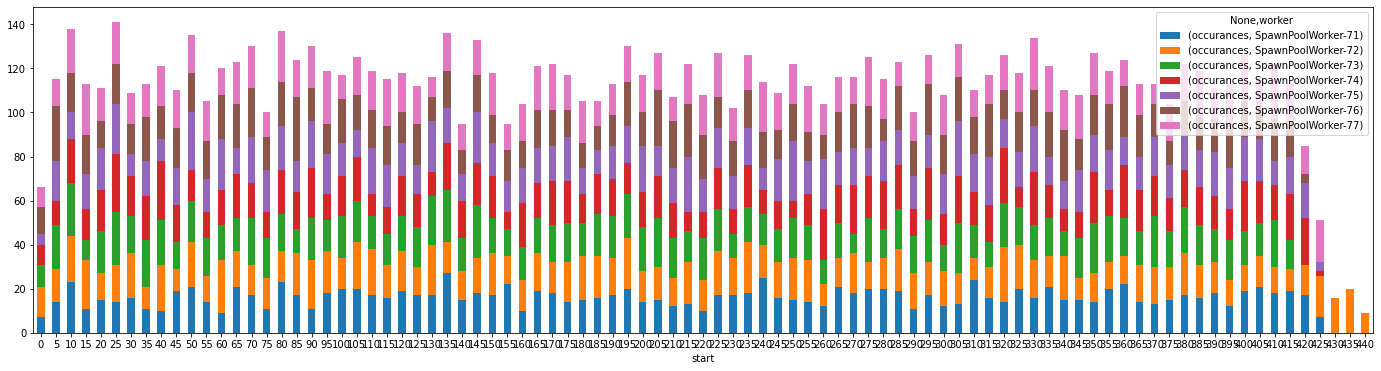

In [11]:
fig, ax = plt.subplots(figsize=(24, 6))
worker_occurances_df.plot(kind="bar", ax=ax, rot=0, stacked=True)